# Plan
- Data Cleaning and Preparation
- Exploratory Data Analysis (EDA)
- Job Market Analysis
- Visualization and Reporting

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
import seaborn as sns

D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('jobs.csv')
df

,Job Name,Company Name,Location,Date Posted,Job Specialization,Job Type,Job Link
0,Email & Back Office Support • 100% Non-Voice,TRANSEC BPO SOLUTIONS INC.,National Capital Reg,4/13/2023,Services,Full-Time,https://www.jobstreet.com.ph/en/job/email-back...
1,Bank Teller,Metropolitan Bank & Trust Company,"Cagayan (Tuguegarao City), Isabela",4/13/2023,Services,Full-Time,https://www.jobstreet.com.ph/en/job/bank-telle...
2,Bank Teller (Bataan),Metropolitan Bank & Trust Company,Bataan (Others),4/13/2023,Services,Full-Time,https://www.jobstreet.com.ph/en/job/bank-telle...
3,Quality Assurance Staff,MERALCO,Pasig City,4/13/2023,Services,Full-Time,https://www.jobstreet.com.ph/en/job/quality-as...
4,EXPERIENCED OFFICE STAFF,Diversfied Agrochemicals Trading Corp.,Quezon City,4/13/2023,Services,Full-Time,https://www.jobstreet.com.ph/en/job/experience...
...,...,...,...,...,...,...,...
54569,Outbound na Ahente ng Call Center,METACOM BUSINESS PROCESS OUTSOURCING SOLUTIONS,"Quezon, Quezon City",3/19/2023,Computer/Information Technology,Full-Time,https://www.jobstreet.com.ph/en/job/outbound-n...
54570,"Director, Transport (Smart Mobility Solutions)",Asian Development Bank (ADB),National Capital Reg,3/19/2023,Computer/Information Technology,Full-Time,https://www.jobstreet.com.ph/en/job/director-t...
54571,Vice President – Investment Middle Office Serv...,JPMorgan Chase Bank NA - Philippine Global Ser...,National Capital Reg,3/19/2023,Computer/Information Technology,Full-Time,https://www.jobstreet.com.ph/en/job/vice-presi...
54572,Treasury Senior Specialist - Japanese Speaker,Manulife Philippines,"Quezon, Quezon City",3/23/2023,Computer/Information Technology,Full-Time,https://www.jobstreet.com.ph/en/job/treasury-s...


## Data Cleaning and Preparation


### To do
---
- Check for missing values
    - Check the dataset for any missing values in any of the columns
- Check for duplicates
    - Check the dataset for any duplicate rows
- Standardize column names
    - Check if the column names are consistent across the dataset
- Data type conversion
    - Check if each column has the correct data type
- Data normalization
    -  Check if any columns need to be normalized
- Removing irrelevant columns
    -  Identify any columns that are not relevant to this analysis

In [3]:
# Check for missing values
for column in df.columns:
    print(f'{column} - {round(np.mean(df[column].isnull()) * 100)}%')

Job Name - 0%
Company Name - 0%
Location - 0%
Date Posted - 0%
Job Specialization - 0%
Job Type - 0%
Job Link - 0%


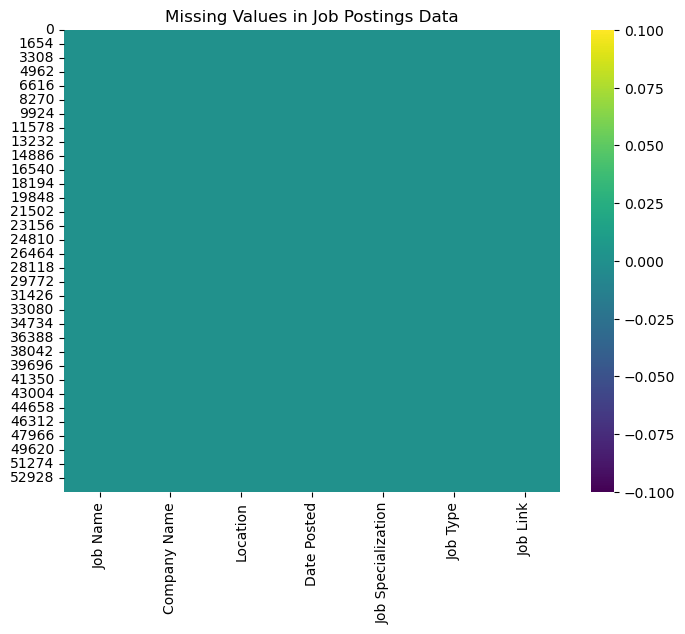

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values in Job Postings Data')
plt.show()

In [5]:
# Check for duplicates
print(df.duplicated().sum())

0


In [6]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['job_name', 'company_name', 'location', 'date_posted',
       'job_specialization', 'job_type', 'job_link'],
      dtype='object')

In [7]:
# Data type conversion
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [8]:
# Data normalization

## normalize the values in lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df.head()

,job_name,company_name,location,date_posted,job_specialization,job_type,job_link
0,email & back office support • 100% non-voice,transec bpo solutions inc.,national capital reg,2023-04-13,services,full-time,https://www.jobstreet.com.ph/en/job/email-back...
1,bank teller,metropolitan bank & trust company,"cagayan (tuguegarao city), isabela",2023-04-13,services,full-time,https://www.jobstreet.com.ph/en/job/bank-telle...
2,bank teller (bataan),metropolitan bank & trust company,bataan (others),2023-04-13,services,full-time,https://www.jobstreet.com.ph/en/job/bank-telle...
3,quality assurance staff,meralco,pasig city,2023-04-13,services,full-time,https://www.jobstreet.com.ph/en/job/quality-as...
4,experienced office staff,diversfied agrochemicals trading corp.,quezon city,2023-04-13,services,full-time,https://www.jobstreet.com.ph/en/job/experience...


In [9]:
## transforming the format of the job_name and location by generalizing it
df.job_name = df.job_name.apply(lambda text: re.search(r'\b([A-Za-z]+\s*)+\b', text).group(0) if re.search(r'\b([A-Za-z]+\s*)+\b', text) else text)
df.location = df.location.apply(lambda text: re.search(r'\b([A-Za-z]+\s*)+\b', text).group(0) if re.search(r'\b([A-Za-z]+\s*)+\b', text) else text)

In [10]:
# Removing irrelevant columns
df = df.drop('job_link', axis=1)

## Exploratory Data Analysis (EDA) & Job Market Analysis

### To do
---
- Univariate Analysis
  - Showing the frequency of each categorical variable
      - Determine the most popular jobs
      - Determine which companies are most active in the job market
      - Determine the most common job specializations
      - Determine the most popular jobs types
      - Analyze how job trends changed over time
- Bivariate Analysis
  - Exploring the relationship between pairs of variables in the dataset
      - Determine the most in-demand locations
      - Analyzes how the trends have changed over time
- Interpret the results
  - Understand the findings
- Bonus
  - Select your Job Specialization for analysis


The plot shows the distribution of job names in the dataset, with the top 20 most frequently occurring job names displayed on the y-axis and the frequency of each job name displayed on the x-axis.

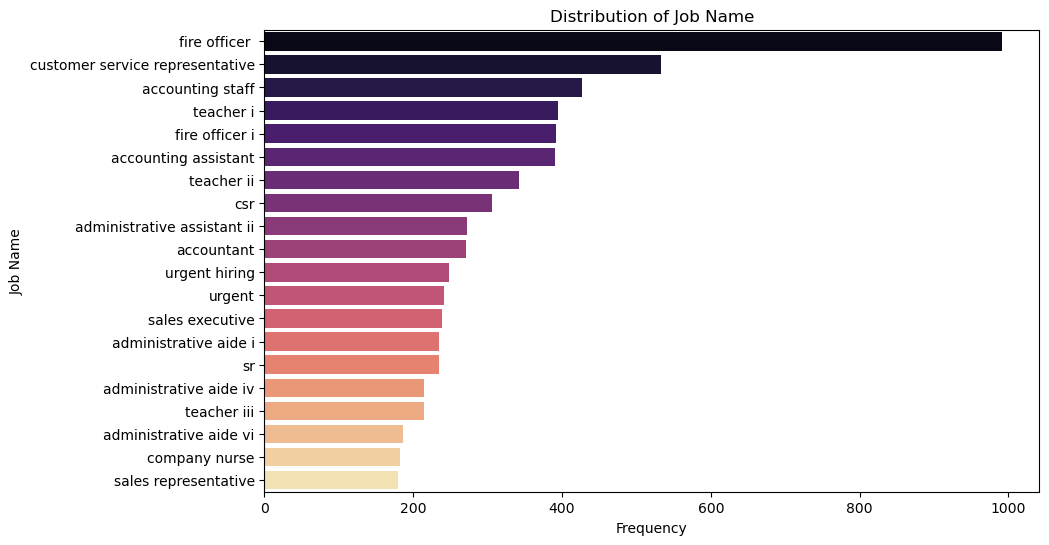

In [11]:
## Univariate Analysis
job_specialization_counts = df['job_name'].value_counts().nlargest(20)

# create horizontal bar plot with seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=job_specialization_counts.values, y=job_specialization_counts.index, palette='magma')
plt.title('Distribution of Job Name')
plt.xlabel('Frequency')
plt.ylabel('Job Name')
plt.show()

The plot shows the distribution of job postings by company name. The horizontal bar plot displays the top 20 companies with the highest number of job postings. The x-axis represents the frequency or the number of job postings, while the y-axis represents the company name.

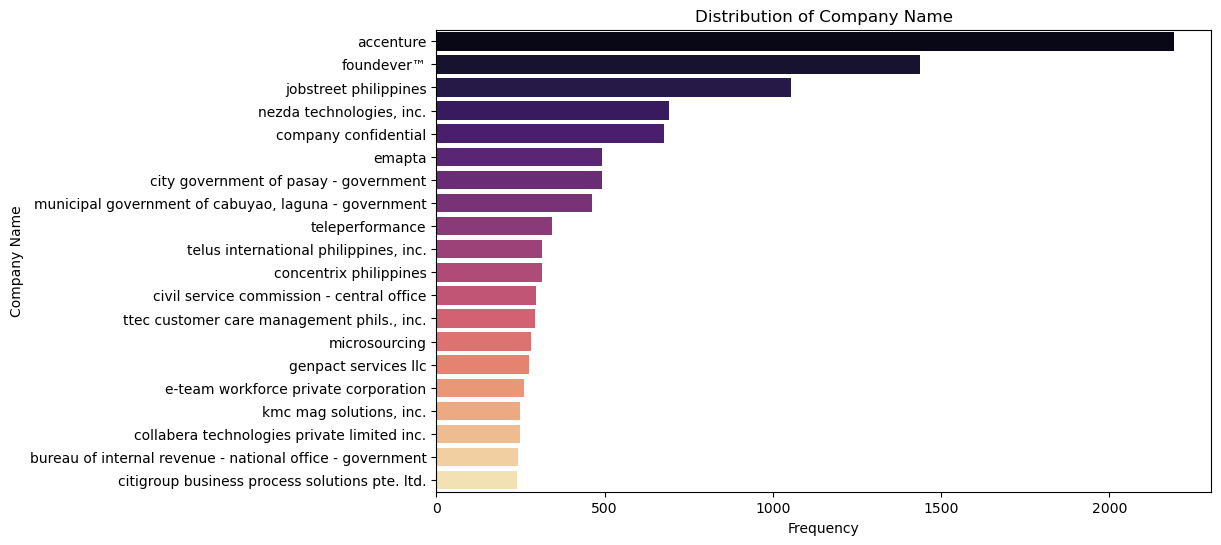

In [12]:
job_specialization_counts = df['company_name'].value_counts().nlargest(20)

# create horizontal bar plot with seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=job_specialization_counts.values, y=job_specialization_counts.index, palette='magma')
plt.title('Distribution of Company Name')
plt.xlabel('Frequency')
plt.ylabel('Company Name')
plt.show()

This plot shows the distribution of job specialization in the dataset. The y-axis represents the job specialization categories while the x-axis represents the frequency or the number of job postings that fall under each category. The plot is sorted in descending order based on the frequency.

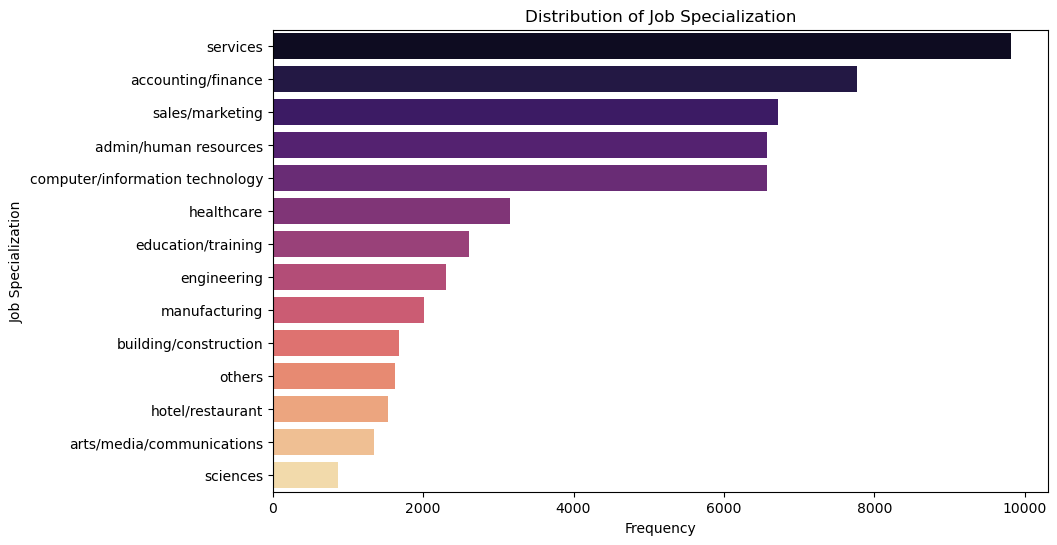

In [13]:
job_specialization_counts = df['job_specialization'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=job_specialization_counts.values, y=job_specialization_counts.index, palette='magma')
plt.title('Distribution of Job Specialization')
plt.xlabel('Frequency')
plt.ylabel('Job Specialization')
plt.show()

This plot shows the distribution of job postings by job type. The x-axis shows the different types of job postings (full-time, part-time, contract, etc.), while the y-axis shows the count of job postings for each job type. The height of each bar represents the number of job postings for that particular job type. The plot can help us to understand which types of job postings are more common or in demand in the job market.

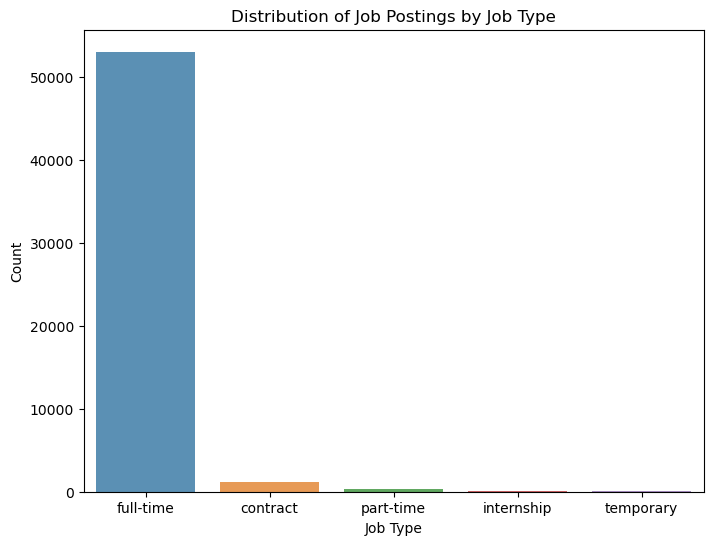

In [14]:
job_type_counts = df['job_type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, alpha=0.8)
plt.title('Distribution of Job Postings by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()


The plot shows how the count of job postings varied over time during this period, with some days having a higher count than others. It also shows an overall increasing trend in the number of job postings over time, with a peak on April 13, 2023, which is the last date in the dataset.

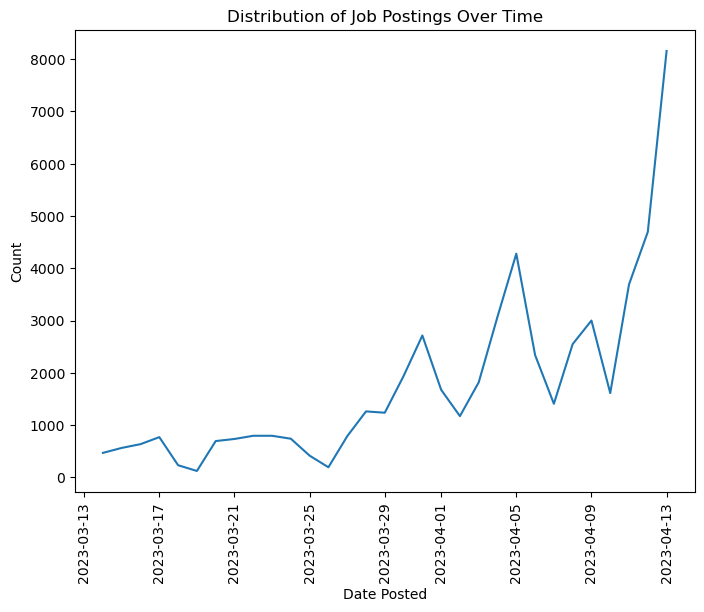

In [15]:
job_postings_by_date = df.groupby('date_posted').size().reset_index(name='count')
plt.figure(figsize=(8,6))
sns.lineplot(x='date_posted', y='count', data=job_postings_by_date)
plt.title('Distribution of Job Postings Over Time')
plt.xlabel('Date Posted')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The resulting heatmap shows the distribution of job postings by the top 10 locations and job types (Full-time) in the dataset

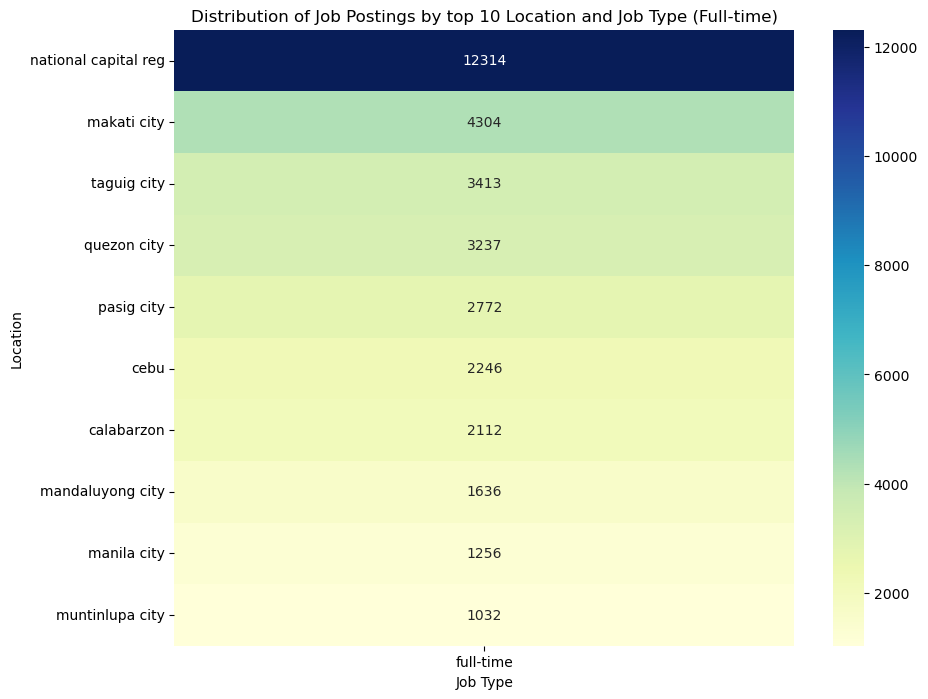

In [16]:
## Bivariate Analysis

job_postings_by_location_and_type = df.groupby(['location', 'job_type']).size().nlargest(10).unstack(fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(job_postings_by_location_and_type, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Distribution of Job Postings by top 10 Location and Job Type (Full-time)')
plt.xlabel('Job Type')
plt.ylabel('Location')
plt.show()

For the line graph, we can see that the distribution of job postings for each job type has changed over time. The x-axis represents the date each job posting was made, and the y-axis represents the count of job postings for each combination of job type and date posted.

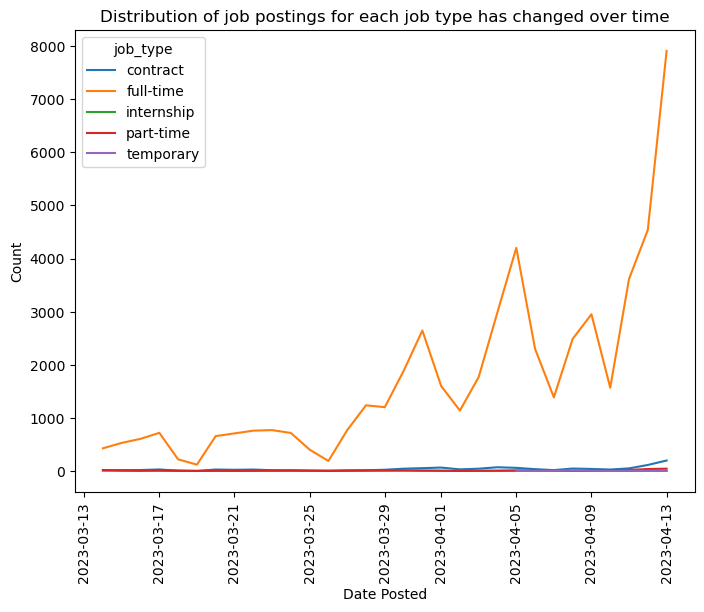

In [17]:
grouped = df.groupby(['job_type', 'date_posted'])
counts = grouped.size()
counts = counts.reset_index(name='Count')

plt.figure(figsize=(8,6))
sns.lineplot(data=counts, x='date_posted', y='Count', hue='job_type')
plt.title('Distribution of job postings for each job type has changed over time')
plt.xlabel('Date Posted')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the heatmap, we can see which job specializations are most commonly associated with which job types

<AxesSubplot:xlabel='job_type', ylabel='job_specialization'>

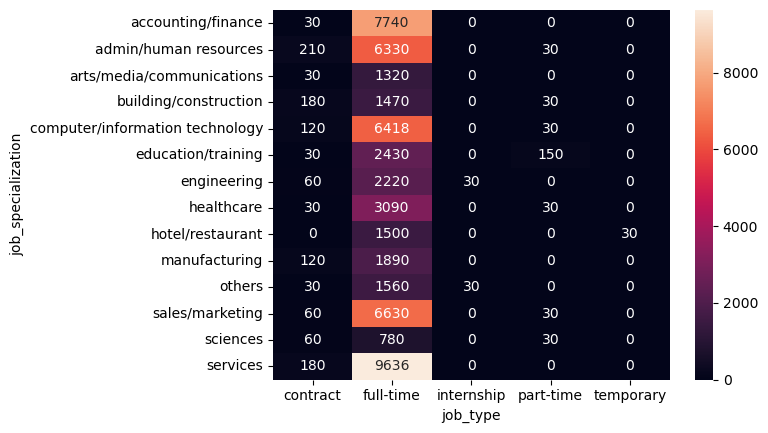

In [117]:
contingency_table = pd.crosstab(df.job_specialization, df.job_type)
sns.heatmap(contingency_table, annot=True, fmt='d')

## Bonus
### Trends of computer/information technology in the job market

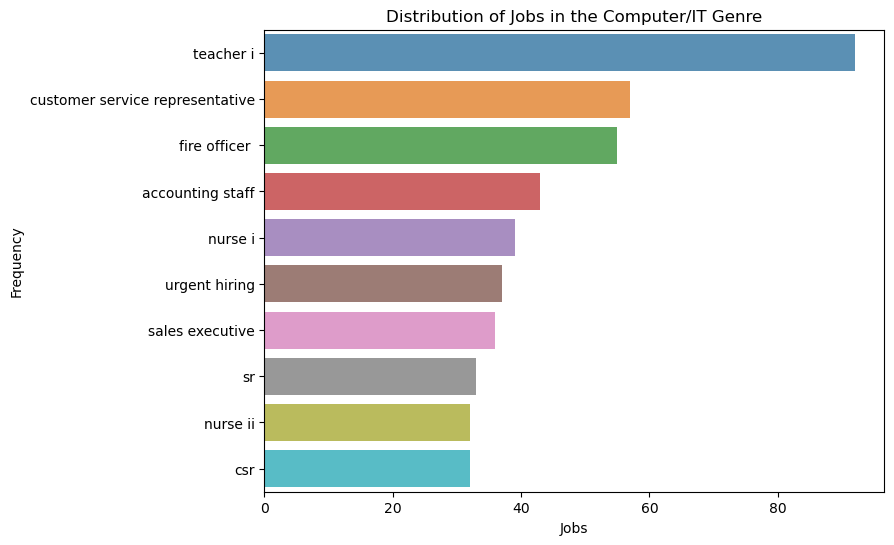

In [50]:
# Filter the dataset to only include Computer/Information Technology jobs
df_it = df[df['job_specialization'] == 'computer/information technology']

job_n = df_it['job_name'].value_counts().nlargest(10)

plt.figure(figsize=(8,6))
sns.barplot(x=job_n.values, y = job_n.index, alpha=0.8)
plt.title('Distribution of Jobs in the Computer/IT Genre')
plt.xlabel('Jobs')
plt.ylabel('Frequency')
plt.show()

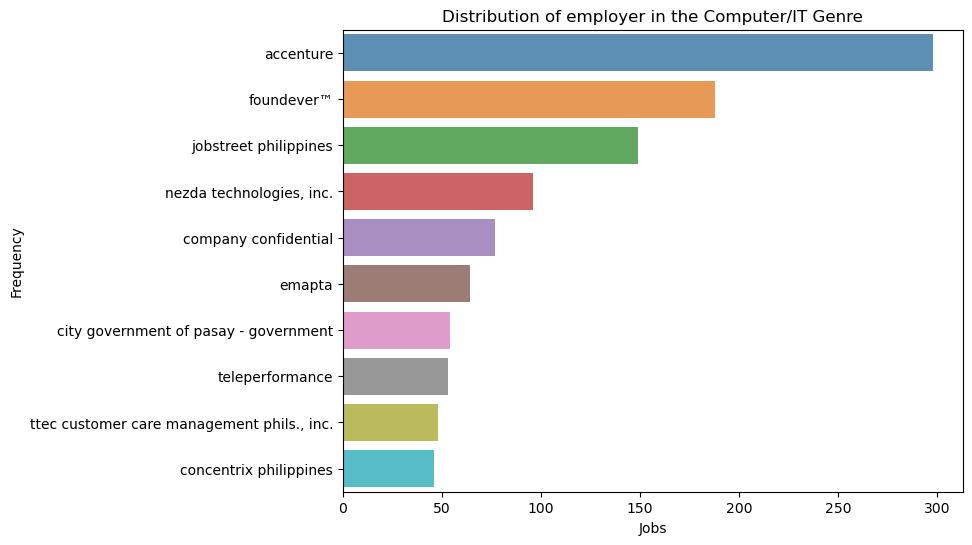

In [52]:
comp_n = df_it['company_name'].value_counts().nlargest(10)

plt.figure(figsize=(8,6))
sns.barplot(x=comp_n.values, y = comp_n.index, alpha=0.8)
plt.title('Distribution of employer in the Computer/IT Genre')
plt.xlabel('Jobs')
plt.ylabel('Frequency')
plt.show()

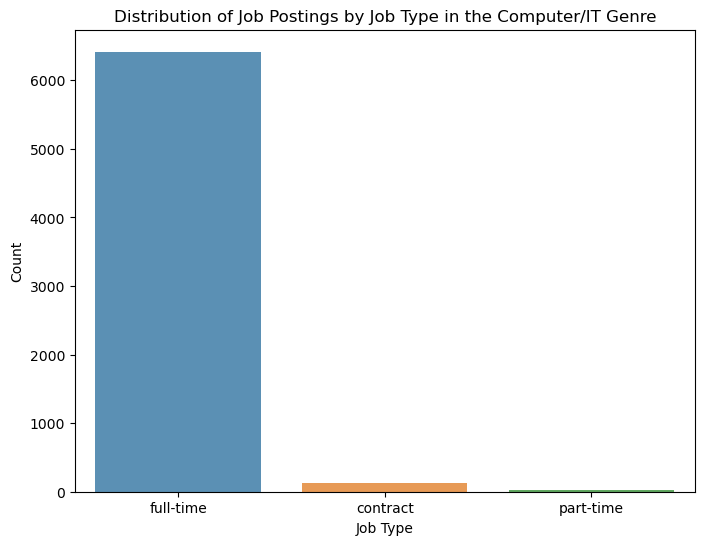

In [53]:
job_type_counts = df_it['job_type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, alpha=0.8)
plt.title('Distribution of Job Postings by Job Type in the Computer/IT Genre')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

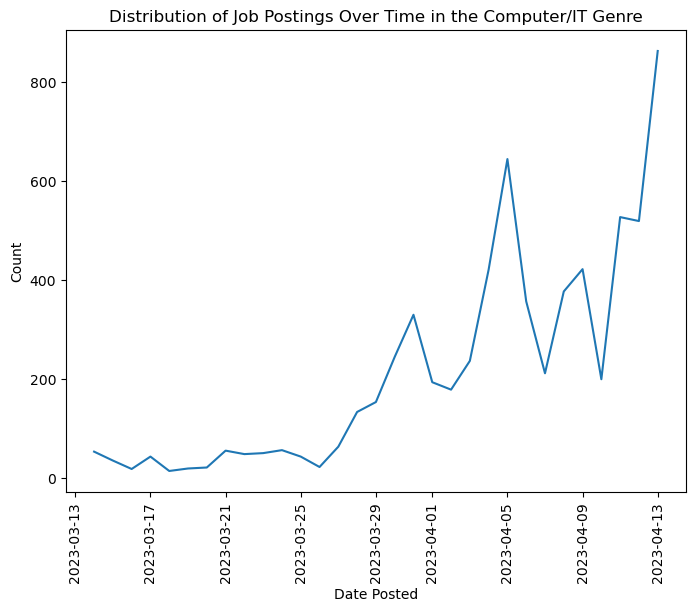

In [55]:
job_postings_by_date = df_it.groupby('date_posted').size().reset_index(name='count')
plt.figure(figsize=(8,6))
sns.lineplot(x='date_posted', y='count', data=job_postings_by_date)
plt.title('Distribution of Job Postings Over Time in the Computer/IT Genre')
plt.xlabel('Date Posted')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

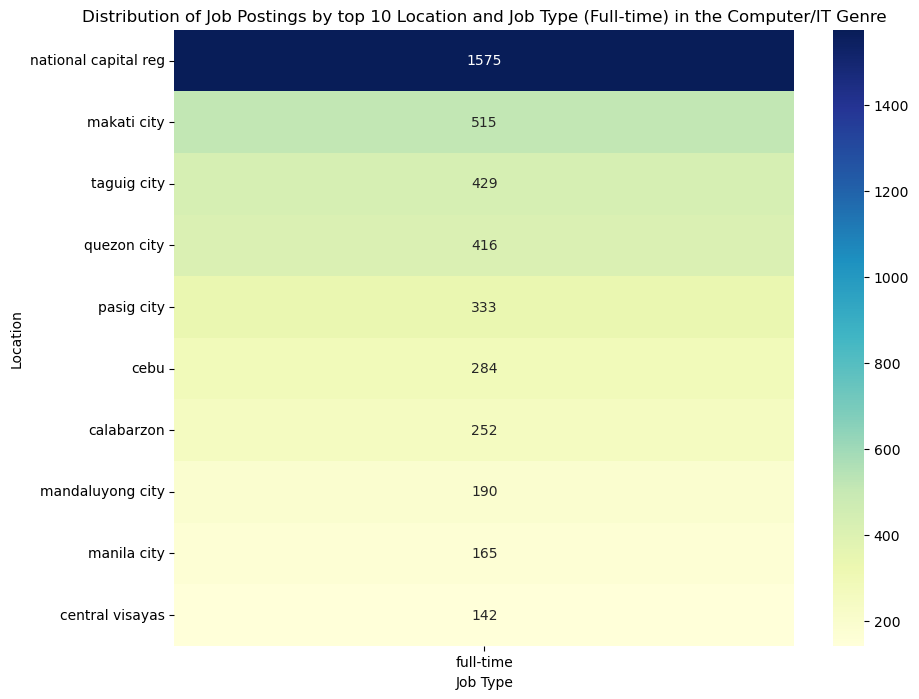

In [57]:
job_postings_by_location_and_type = df_it.groupby(['location', 'job_type']).size().nlargest(10).unstack(fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(job_postings_by_location_and_type, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Distribution of Job Postings by top 10 Location and Job Type (Full-time) in the Computer/IT Genre')
plt.xlabel('Job Type')
plt.ylabel('Location')
plt.show()

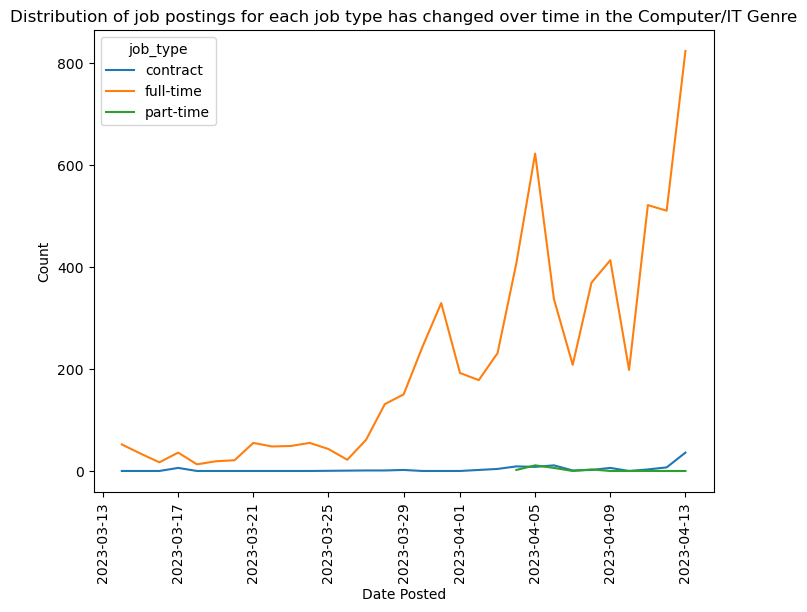

In [59]:
grouped = df_it.groupby(['job_type', 'date_posted'])
counts = grouped.size()
counts = counts.reset_index(name='Count')

plt.figure(figsize=(8,6))
sns.lineplot(data=counts, x='date_posted', y='Count', hue='job_type')
plt.title('Distribution of job postings for each job type has changed over time in the Computer/IT Genre')
plt.xlabel('Date Posted')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()